# Анализ оттока клиентов банка
Заказчик этого исследования - отдел маркетинга "Метанпромбанка". 

В банке последнее время повысился отток клиентов, что угрожает его существованию. Для анализа проблемы банк в срочном порядке ищет аналитиков с уверенным владением «Python». Информация нужна менеджеру, который занимается маркетинговыми кампаниями и работает в тесной связке с менеджерами продуктов.

**Цель исследования** - изучить причины оттока клиентов

**Задача исследования** - анализ клиентов регионального банка и выделение сегментов клиентов, которые склонны уходить из банка

**Ход исследования:**

Данные получим из датафрейма bank_scrooge. Изучим его наполнение, состав и структуру.

Перед исследовательским анализом проведем предобработку данных - приведем названия столбцов к общему виду, преобразуем данные в нужные типы, проверим датарейм на явные и неявные дубликаты, а также на пропуски. 

На этапе исследовательского анализа данных определим все значимые признаки отточности, сравним портреты типичных клиентов, которые склонны и не склонны уходить из банка. Сформулируем и проверим статистические гипотезы. На основании полученных данных о признаках отточности, сформируем сегменты и дадим рекомендации банку. 

Отчет для заказчика подготовим в виде презентации. 

Таким образом, исследование пройдет в 6 этапов:
- обзор данных
- предобработка данных
- исследовательский анализ данных
- формирование сегментов пользователей
- общие выводы и рекомендации заказчику
- оформление результатов в виде презентации

## Обзор данных

In [1]:
pip install phik

Note: you may need to restart the kernel to use updated packages.


In [2]:
#импортируем библиотеки
import pandas as pd
import phik
pd.set_option('display.float_format', '{:,.2f}'.format)
from plotly import graph_objects as go 
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
#считываем csv-файл
bank = pd.read_csv('/datasets/bank_scrooge.csv')

In [4]:
#выводим информацию и первые 5 строк датафрейма bank
bank.info()
bank.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.00,Рыбинск,Ж,25.00,1,"59,214.82",2,0,1,"75,719.14",1
1,146556,861.00,Рыбинск,Ж,37.00,5,"850,594.33",3,1,0,"86,621.77",0
2,120722,892.00,Рыбинск,Ж,30.00,0,NaN,1,1,1,"107,683.34",0
3,225363,866.00,Ярославль,Ж,51.00,5,"1,524,746.26",2,0,1,"174,423.53",1
4,157978,730.00,Ярославль,М,34.00,5,174.00,1,1,0,"67,353.16",1


**В исходном датафрейме 10000 записей, 12 столбцов. Информация довольна развернутая, в некоторых столбцах есть пропуски. Следует привести все названия столбцов к нижнему регистру и преобразовать данные в нужные типы.**

## Предобработка данных

In [5]:
#приведем названия столбцов к общему виду
bank.rename(columns = {'USERID':'user_id', 'EST_SALARY':'est_salary'}, inplace = True)

In [6]:
bank.info()
bank.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  est_salary     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.00,Рыбинск,Ж,25.00,1,"59,214.82",2,0,1,"75,719.14",1
1,146556,861.00,Рыбинск,Ж,37.00,5,"850,594.33",3,1,0,"86,621.77",0
2,120722,892.00,Рыбинск,Ж,30.00,0,NaN,1,1,1,"107,683.34",0
3,225363,866.00,Ярославль,Ж,51.00,5,"1,524,746.26",2,0,1,"174,423.53",1
4,157978,730.00,Ярославль,М,34.00,5,174.00,1,1,0,"67,353.16",1


In [7]:
#проверим датафрейм на наличие дубликатов
bank.duplicated().sum()

0

In [8]:
#проверим дубликаты в столбце user_id
bank['user_id'].duplicated().sum()
bank[bank['user_id'].duplicated()]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1583,190253,726.00,Ярославль,М,49.00,0,NaN,1,1,1,"177,700.78",0
1837,210662,896.00,Рыбинск,Ж,37.00,0,NaN,2,0,0,"90,916.04",0
2138,131419,739.00,Рыбинск,Ж,37.00,3,"1,307,941.65",3,0,0,"103,867.47",0
2165,187635,692.00,Рыбинск,Ж,NaN,0,NaN,1,1,1,"160,368.82",0
2302,220816,934.00,Рыбинск,Ж,74.00,5,"1,294,285.39",3,1,0,"95,606.80",0
...,...,...,...,...,...,...,...,...,...,...,...,...
9775,124450,758.00,Рыбинск,Ж,36.00,0,"73,574.07",2,0,1,"79,963.59",0
9785,168998,895.00,Рыбинск,М,44.00,0,"282,653.53",3,0,0,"255,296.47",0
9819,140934,832.00,Рыбинск,Ж,NaN,3,"385,763.16",2,0,1,"59,651.35",0
9880,217412,886.00,Ярославль,Ж,35.00,3,"1,026,172.14",2,1,0,"53,099.16",0


In [9]:
#выведем дубликаты user_id
user_duplicates = bank[bank['user_id'].duplicated()]
user_duplicates

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1583,190253,726.00,Ярославль,М,49.00,0,NaN,1,1,1,"177,700.78",0
1837,210662,896.00,Рыбинск,Ж,37.00,0,NaN,2,0,0,"90,916.04",0
2138,131419,739.00,Рыбинск,Ж,37.00,3,"1,307,941.65",3,0,0,"103,867.47",0
2165,187635,692.00,Рыбинск,Ж,NaN,0,NaN,1,1,1,"160,368.82",0
2302,220816,934.00,Рыбинск,Ж,74.00,5,"1,294,285.39",3,1,0,"95,606.80",0
...,...,...,...,...,...,...,...,...,...,...,...,...
9775,124450,758.00,Рыбинск,Ж,36.00,0,"73,574.07",2,0,1,"79,963.59",0
9785,168998,895.00,Рыбинск,М,44.00,0,"282,653.53",3,0,0,"255,296.47",0
9819,140934,832.00,Рыбинск,Ж,NaN,3,"385,763.16",2,0,1,"59,651.35",0
9880,217412,886.00,Ярославль,Ж,35.00,3,"1,026,172.14",2,1,0,"53,099.16",0


In [10]:
#посмотрим долю денежный средств, которая "сидит" в этих дубликатах
duplicates_ratio = (user_duplicates['balance'].sum() / bank['balance'].sum())*100
duplicates_ratio

0.3600801234199939

*Менее 1% денежных средств в 73 дубликатах, можно удалить эти записи*

In [11]:
#удалим дубликаты
bank = bank.drop(index= user_duplicates.index, axis=0)

In [12]:
#проверим дубликаты по столбцам user_id, gender и age
bank.duplicated(subset = ['user_id', 'gender', 'age']).sum()

0

In [13]:
#проверим датафрейм на наличие пропусков
bank.isna().sum()

user_id             0
score               0
city                0
gender              0
age                 4
equity              0
balance          2260
products            0
credit_card         0
last_activity       0
est_salary          0
churn               0
dtype: int64

*Так как в процентном соотношении количество пропусков в столбце balance превышает 20% и заменить мы их ничем не можем, оставим пока его без изменений*

In [14]:
#выведем пропуски в столбце age
bank[bank['age'].isna()]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1247,228075,932.00,Ярославль,М,NaN,5,"7,601,719.20",2,1,1,"408,121.16",0
3091,138660,836.00,Ростов,Ж,NaN,5,"294,315.53",2,0,1,"63,310.22",1
4912,210674,834.00,Рыбинск,М,NaN,1,"238,330.52",2,0,1,"93,775.06",0
7345,184913,829.00,Ярославль,Ж,NaN,3,"188,648.77",2,0,1,"75,206.90",0


*Так как всего 4 пропуска, среди которых ушел из банка только 1 пользователь, удалим данные записи*

In [15]:
bank.drop([1247, 3091, 4912, 7345], inplace=True)

In [16]:
#проверим категориальные значения
print(bank['city'].unique())
print(bank['gender'].unique())

['Рыбинск' 'Ярославль' 'Ростов']
['Ж' 'М']


In [17]:
#проверим наличие клиентов, у которых нет продуктов банка
bank.query('products == 0')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
8957,147837,962.00,Рыбинск,Ж,79.00,3,NaN,0,0,0,"25,063.96",1


*Так как у клиента банка не может не быть продуктов, то значение 0 в данном случае выступает аномалией, удалим эту запись*

In [18]:
#удалим строку с аномальным значением
bank.drop(bank[bank['products'] == 0].index, inplace=True)

In [19]:
#проверим результат после удаления
bank.query('products == 0')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn


In [20]:
#преобразуем данные в нужные типы
bank['score'] = bank['score'].astype('int64')
bank['age'] = bank['age'].astype('int64')

In [21]:
#проверим, как изменился датафрейм после всех преобразований
bank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9922 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        9922 non-null   int64  
 1   score          9922 non-null   int64  
 2   city           9922 non-null   object 
 3   gender         9922 non-null   object 
 4   age            9922 non-null   int64  
 5   equity         9922 non-null   int64  
 6   balance        7663 non-null   float64
 7   products       9922 non-null   int64  
 8   credit_card    9922 non-null   int64  
 9   last_activity  9922 non-null   int64  
 10  est_salary     9922 non-null   float64
 11  churn          9922 non-null   int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 1007.7+ KB


**В результате предобработки данных:**
- названия всех столбцов были приведены к общему виду
- значения столбцов score и age были приведены к типу Int64
- обработаны пропуски
- были удалены дубликаты по столбцу user_id, а также строка с нулевым значением в колонке product

## Исследовательский анализ данных

In [22]:
#изучим общую информацию о датафрейме
bank.describe()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,"9,922.00","9,922.00","9,922.00","9,922.00","7,663.00","9,922.00","9,922.00","9,922.00","9,922.00","9,922.00"
mean,"171,733.89",848.72,42.73,2.63,"828,248.16",1.87,0.68,0.52,"147,898.87",0.18
std,"33,695.22",65.39,12.17,1.98,"1,984,247.69",0.79,0.47,0.50,"139,365.46",0.39
min,"94,561.00",642.00,18.00,0.00,0.00,1.00,0.00,0.00,"2,546.30",0.00
25%,"142,715.00",802.00,33.00,0.00,"295,498.98",1.00,0.00,0.00,"75,254.04",0.00
50%,"172,643.00",853.00,40.00,3.00,"524,961.22",2.00,1.00,1.00,"119,735.43",0.00
75%,"201,157.75",900.00,51.00,4.00,"980,801.49",2.00,1.00,1.00,"174,679.64",0.00
max,"229,145.00","1,000.00",86.00,9.00,"119,113,552.01",5.00,1.00,1.00,"1,395,064.45",1.00


In [23]:
#составим сравнительную характеристику для количественных показателей по churn
bank.groupby(['churn'])['score', 'age', 'equity', 'balance',
       'products', 'credit_card', 'last_activity', 'est_salary'].agg(
       ['mean', 'median']).T

churn                         0            1
score         mean       845.44       863.36
              median     848.00       866.00
age           mean        43.02        41.43
              median      40.00        39.00
equity        mean         2.38         3.76
              median       3.00         4.00
balance       mean   733,828.60 1,134,458.21
              median 475,354.80   783,908.90
products      mean         1.76         2.38
              median       2.00         2.00
credit_card   mean         0.71         0.55
              median       1.00         1.00
last_activity mean         0.48         0.70
              median       0.00         1.00
est_salary    mean   147,795.99   148,357.48
              median 118,248.51   125,408.88

In [24]:
#посмотрим распределение оставшихся/ушедших клиентов исходного датафрейма
bank['churn'].value_counts()

0    8104
1    1818
Name: churn, dtype: int64

*После преобработки датафрейма осталось 1818 записей с отточными клиентами банка*

In [25]:
#выявим отток клиентов банка
bank_churn = (bank['churn'].sum()/bank['churn'].count()).round(2)
bank_churn

0.18

**Текущий отток клиентов составляет 18%**

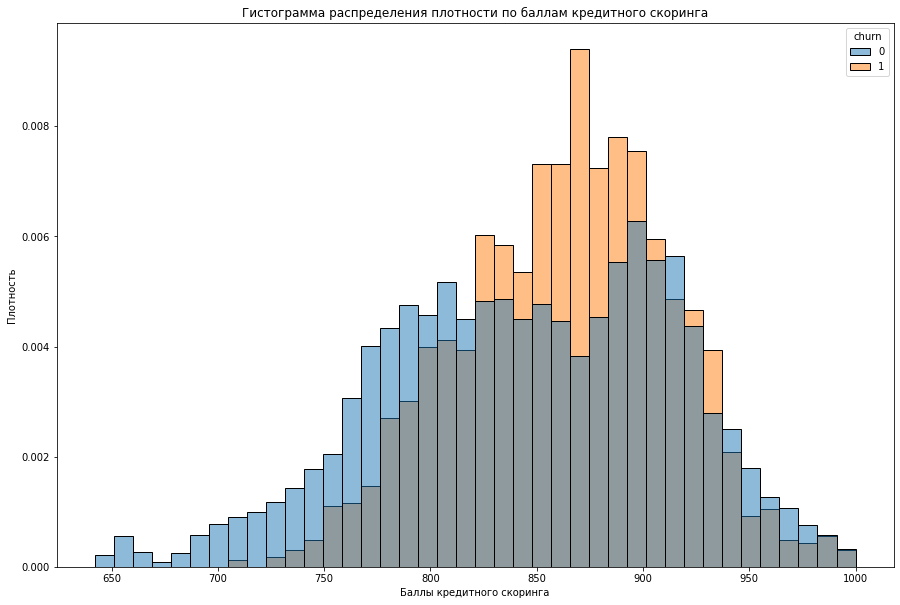

In [26]:
#построим распределение признака оттока по баллам кредитного скоринга
plt.figure(figsize=(15, 10))
sns.histplot(data=bank, x='score', hue='churn', stat='density', common_norm=False)
plt.xlabel('Баллы кредитного скоринга')
plt.ylabel('Плотность')
plt.title('Гистограмма распределения плотности по баллам кредитного скоринга');

*Начиная с 820 и до 900 наблюдается отток клиентов. Также есть интервалы в районе 930-940, где клиенты менее лояльны к банку.*

In [27]:
#изучим отток пользователей по городам
city_churn = bank.pivot_table(index='city', values='churn', aggfunc=['sum', 'count'])
city_churn['out'] = city_churn['sum'] / city_churn['count']*100
city_churn.columns = ['ушло', 'всего', 'доля ушедших, %']
city_churn

,ушло,всего,"доля ушедших, %"
city,,,
Ростов,265,1416,18.71
Рыбинск,436,2652,16.44
Ярославль,1117,5854,19.08


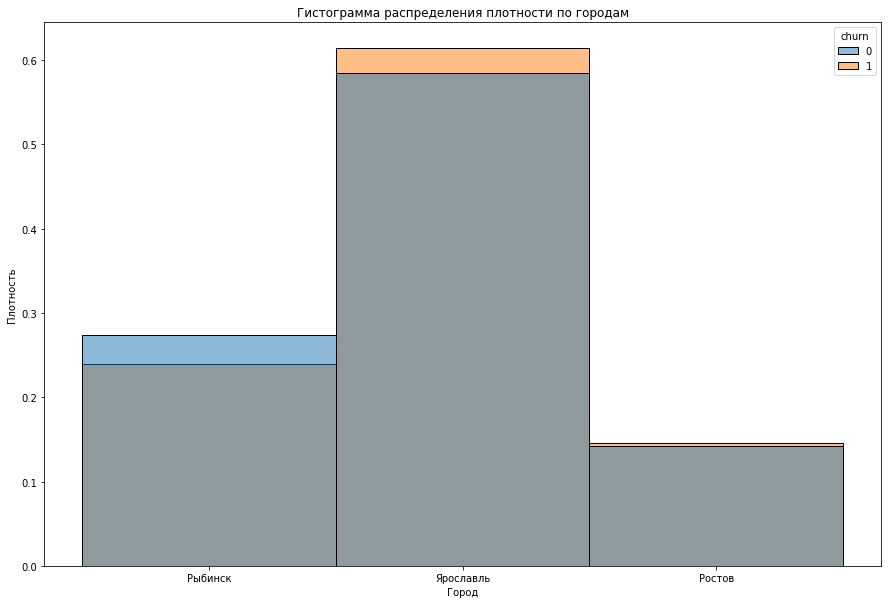

In [28]:
#построим распределение признака оттока по городам
plt.figure(figsize=(15, 10))
sns.histplot(data=bank, x='city', hue='churn', stat='density', common_norm=False, discrete=True)
plt.xlabel('Город')
plt.ylabel('Плотность')
plt.title('Гистограмма распределения плотности по городам');

*Самое большое количество пользователей приходится на Ярославль. Это ожидаемо, с учетом того, что это самый большой город из представленных. Доля ушедших клиентов в каждом городе примерно одинаковая и колеблется от 16 до 19%. Клиенты из Ярославля наиболее склонны к уходу из банка, чем жители Рыбинска и Ростова.*

In [29]:
#изучим отток пользователей по полу
gender_churn = bank.pivot_table(index='gender', values='churn', aggfunc=['sum', 'count'])
gender_churn['out'] = gender_churn['sum'] / gender_churn['count']*100
gender_churn.columns = ['ушло', 'всего', 'доля ушедших, %']
gender_churn

,ушло,всего,"доля ушедших, %"
gender,,,
Ж,635,4952,12.82
М,1183,4970,23.80


*Количество мужчин и женщин-пользователей банка практически одинаковое, однако доля ушедших у мужчин практически в 2 раза превышает долю ушедших у женщин.*

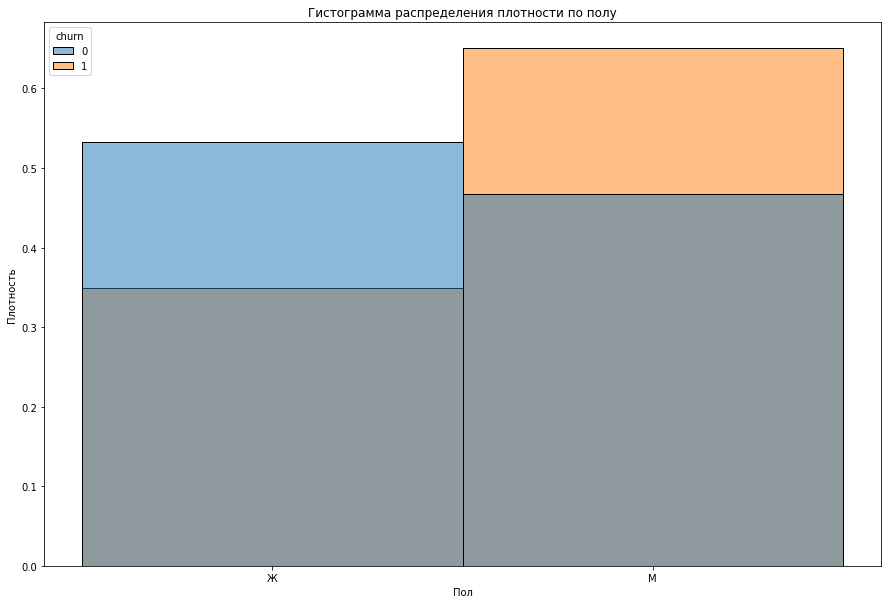

In [30]:
#построим распределение признака оттока по полу
plt.figure(figsize=(15, 10))
sns.histplot(data=bank, x='gender', hue='churn', stat='density', common_norm=False, discrete=True)
plt.xlabel('Пол')
plt.ylabel('Плотность')
plt.title('Гистограмма распределения плотности по полу');

*Гистограмма распределения плотности также указывает на то, что мужчины больше склонны к оттоку, чем женщины*

In [31]:
#изучим отток пользователей по возрасту
age_churn = bank.pivot_table(index='age', values='churn', aggfunc=['sum', 'count'])
age_churn['out'] = age_churn['sum'] / age_churn['count']*100
age_churn.columns = ['ушло', 'всего', 'доля ушедших, %']
age_churn.head(10).sort_values(by='доля ушедших, %', ascending=False)

,ушло,всего,"доля ушедших, %"
age,,,
27,53,171,30.99
21,4,15,26.67
26,39,155,25.16
25,31,140,22.14
22,4,26,15.38
24,13,89,14.61
20,3,23,13.04
23,5,53,9.43
18,1,13,7.69


*Самые большая доля оттока наблюдается у пользователей от 20 до 27 лет. Пик приходится на возраст 27 лет, более 30% от общего числа ушло из банка.*

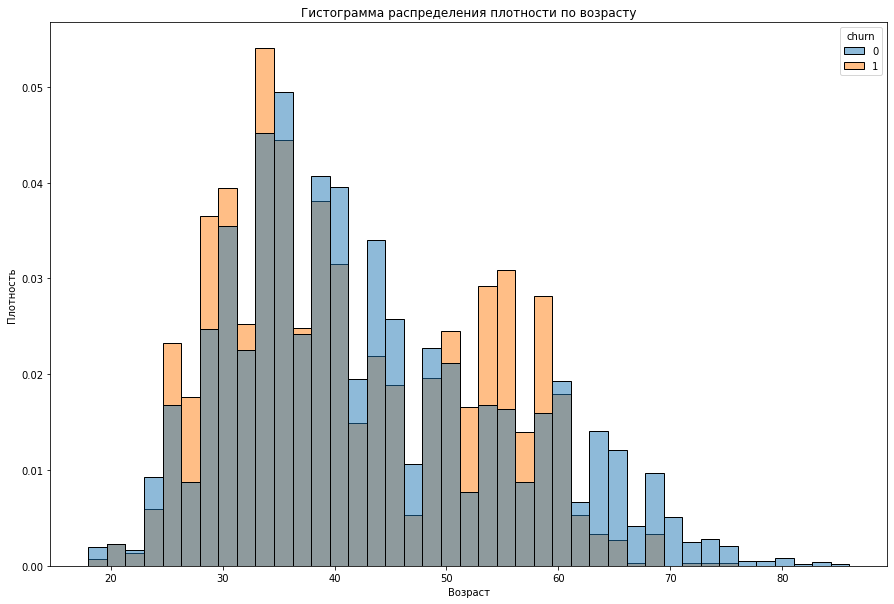

In [32]:
#построим распределение признака оттока по возрасту
plt.figure(figsize=(15, 10))
sns.histplot(data=bank, x='age', hue='churn', stat='density', common_norm=False)
plt.xlabel('Возраст')
plt.ylabel('Плотность')
plt.title('Гистограмма распределения плотности по возрасту');

*К оттоку склонны клиенты от 25 до 35 лет. Это самый "активный" возраст человека, когда есть время и возможность воспользоваться новыми продуктами на рынке, которые предлагают более выгодные условия и партнерские программы. Также наблюдается отток клиентов от 50 до 60 лет. Здесь можно сделать предположение, что это популярный возраст выхода на пенсию, и в случае, если наш банк является зарплатным партнером организаций, то отток неминуем.*

In [33]:
#изучим отток пользователей по баллам собственности
equity_churn = bank.pivot_table(index='equity', values='churn', aggfunc=['sum', 'count'])
equity_churn['out'] = equity_churn['sum'] / equity_churn['count']*100
equity_churn.columns = ['ушло', 'всего', 'доля ушедших, %']
equity_churn.head(10).sort_values(by='доля ушедших, %', ascending=False)

,ушло,всего,"доля ушедших, %"
equity,,,
9,7,13,53.85
7,37,79,46.84
6,58,161,36.02
8,6,17,35.29
5,576,1909,30.17
4,464,1841,25.20
3,321,1531,20.97
2,166,1046,15.87
1,93,771,12.06


*Самые большие значения оттока у клиентов с количеством баллов собственности от 6 до 9, однако основную массу клиентов составляют пользователи с количеством баллов собственности от 0 ло 5. Значения оттока данных пользователей варьируются от 3 до 30%. Стоит отметить, что начиная с пользователей, у которых 3 балла собственности, имеют процент оттока больше 20%.*

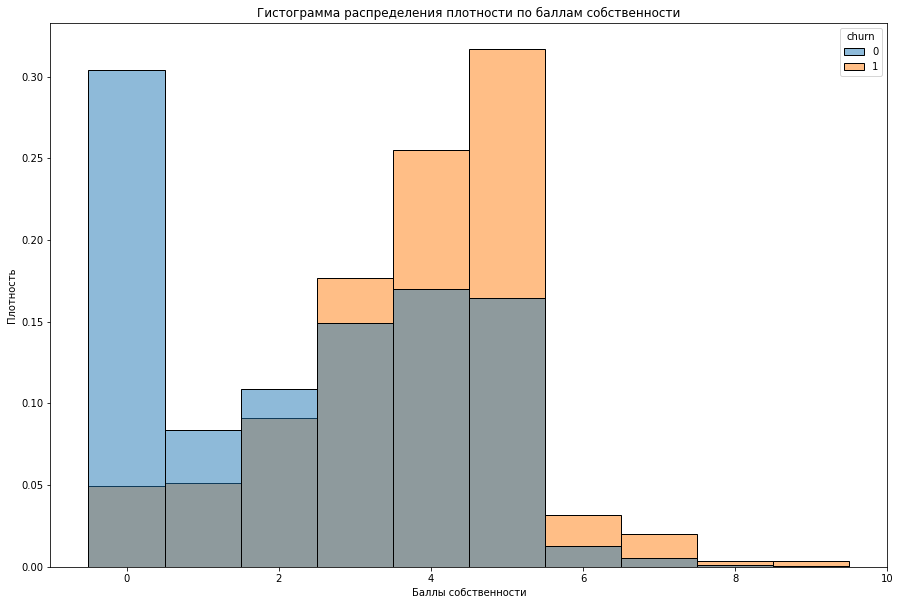

In [34]:
#построим распределение признака оттока по количеству баллов собственности
plt.figure(figsize=(15, 10))
sns.histplot(data=bank, x='equity', hue='churn', stat='density', common_norm=False, discrete=True)
plt.xlabel('Баллы собственности')
plt.ylabel('Плотность')
plt.title('Гистограмма распределения плотности по баллам собственности');

*Гистограмма распределения плотности подтверждает предыдущие рассчеты. Клиенты с баллами собственности от 3 до 9 склонны к оттоку. Наиболее ярко это проявляется у клиентов с 5 баллами.*

*Для определения границ диапазона данных построим боксплот*

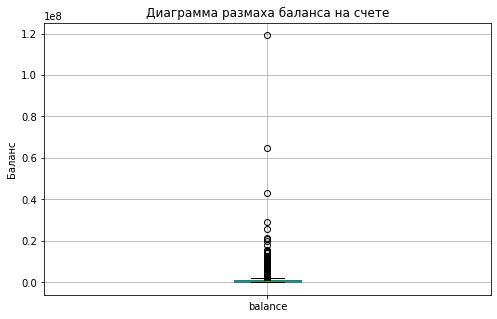

In [35]:
#построим распределение признака оттока по балансу на счете
bank.boxplot(column=['balance'], figsize=(8,5), grid=True)
plt.title('Диаграмма размаха баланса на счете');
plt.ylabel('Баланс')
plt.show()

*Как видим из полученной визуализации, большинство значений располагается в пределах 20млн., далее идут выбросы*

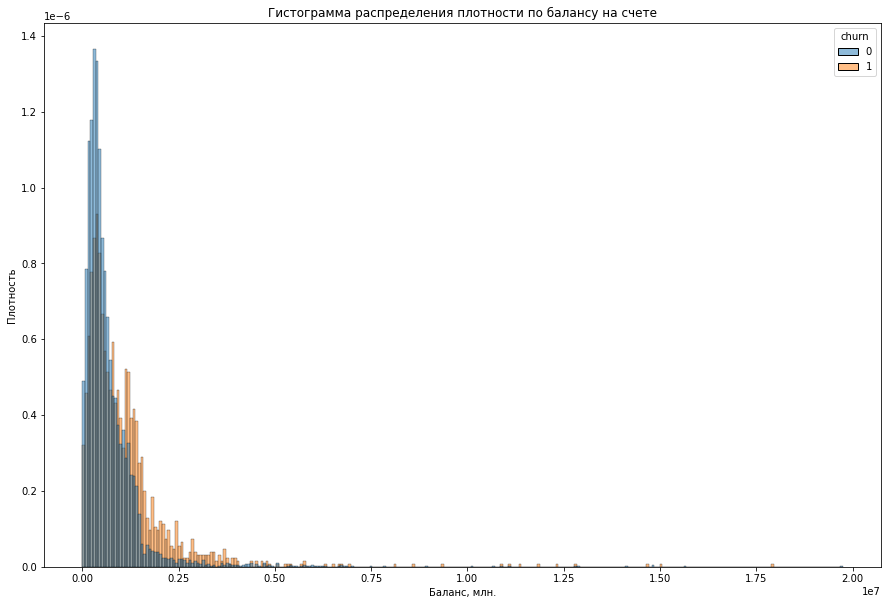

In [36]:
#построим распределение признака оттока по балансу на счете
plt.figure(figsize=(15, 10))
sns.histplot(data=bank[bank['balance'] < 20000000], x='balance', hue='churn', stat='density', common_norm=False)
plt.xlabel('Баланс, млн.')
plt.ylabel('Плотность')
plt.title('Гистограмма распределения плотности по балансу на счете');

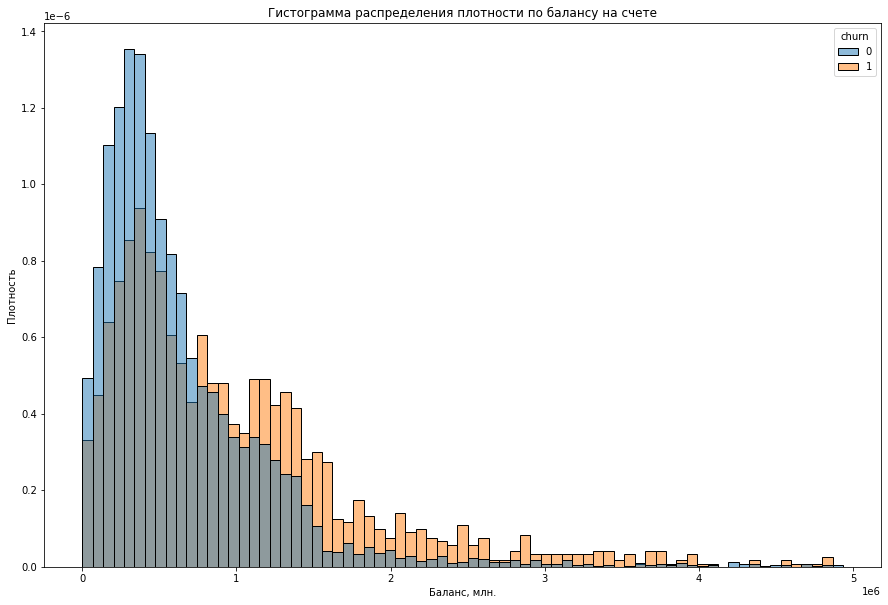

In [37]:
#сделаем срез до 5млн на балансе
plt.figure(figsize=(15, 10))
sns.histplot(data=bank[bank['balance'] < 5000000], x='balance', hue='churn', stat='density', common_norm=False)
plt.xlabel('Баланс, млн.')
plt.ylabel('Плотность')
plt.title('Гистограмма распределения плотности по балансу на счете');

*Клиенты, у которых на счете от 750т.р. и вплоть до 5 млн. более склонны к оттоку, чем клиенты с меньшим балансом на счете*

In [38]:
#изучим отток пользователей по количеству продуктов банка
products_churn = bank.pivot_table(index='products', values='churn', aggfunc=['sum', 'count'])
products_churn['out'] = products_churn['sum'] / products_churn['count']*100
products_churn.columns = ['ушло', 'всего', 'доля ушедших, %']
products_churn.head(10).sort_values(by='доля ушедших, %', ascending=False)

,ушло,всего,"доля ушедших, %"
products,,,
4,300,474,63.29
5,8,19,42.11
3,297,1028,28.89
2,978,5095,19.20
1,235,3306,7.11


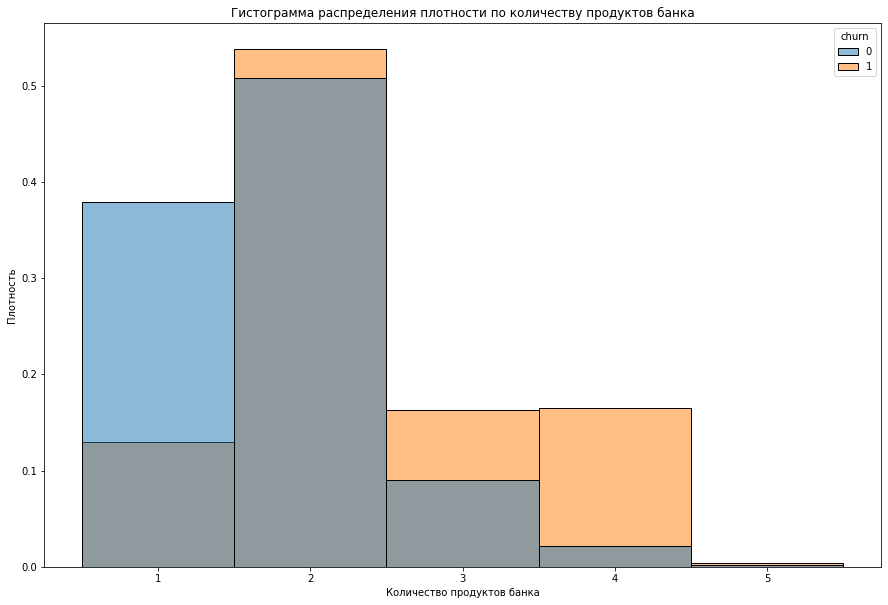

In [39]:
#построим распределение признака оттока по количеству продуктов банка
plt.figure(figsize=(15, 10))
sns.histplot(data=bank, x='products', hue='churn', stat='density', common_norm=False, discrete=True)
plt.xlabel('Количество продуктов банка')
plt.ylabel('Плотность')
plt.title('Гистограмма распределения плотности по количеству продуктов банка');

*Клиенты, у которых от 2 до 4 продуктов банка склонны к оттоку. Можно объяснить это поиском лучших продуктов на стороне у других банков. Пользователи с 1 продуктом не склонны к оттоку, они являются обычными пользователями банковскиой карты.*

In [40]:
#изучим отток пользователей по наличию кредитной карты
credit_card_churn = bank.pivot_table(index='credit_card', values='churn', aggfunc=['sum', 'count'])
credit_card_churn['out'] = credit_card_churn['sum'] / credit_card_churn['count']*100
credit_card_churn.columns = ['ушло', 'всего', 'доля ушедших, %']
credit_card_churn

,ушло,всего,"доля ушедших, %"
credit_card,,,
0,815,3174,25.68
1,1003,6748,14.86


*Пользователей с кредитной картой почти в 2 раза больше клиентов, которые ей не обладают. Доля ушедших больше у клиентов без кредитной карты.*

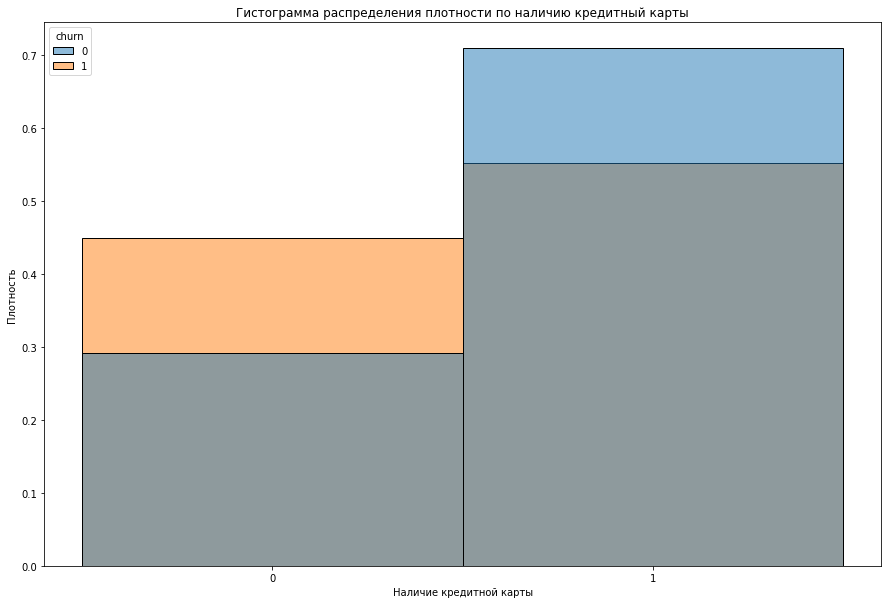

In [41]:
#построим распределение признака оттока по наличию/отсутствии кредитной карты
plt.figure(figsize=(15, 10))
sns.histplot(data=bank, x='credit_card', hue='churn', stat='density', common_norm=False, discrete=True)
plt.xlabel('Наличие кредитной карты')
plt.xticks(np.arange(0, 2, 1))
plt.ylabel('Плотность')
plt.title('Гистограмма распределения плотности по наличию кредитный карты');

*Гистограмма распределения плотности подтверждает предыдущие рассчеты, пользователи с кредитной картой менее склонны к оттоку.*

In [42]:
#изучим отток пользователей по активности
last_activity_churn = bank.pivot_table(index='last_activity', values='churn', aggfunc=['sum', 'count'])
last_activity_churn['out'] = last_activity_churn['sum'] / last_activity_churn['count']*100
last_activity_churn.columns = ['ушло', 'всего', 'доля ушедших, %']
last_activity_churn

,ушло,всего,"доля ушедших, %"
last_activity,,,
0,541,4729,11.44
1,1277,5193,24.59


*При приблизительно одинаковом количестве пользователей в группах, отток активных клиентов в 2 раза превышает значение оттока неактивных пользователей.*

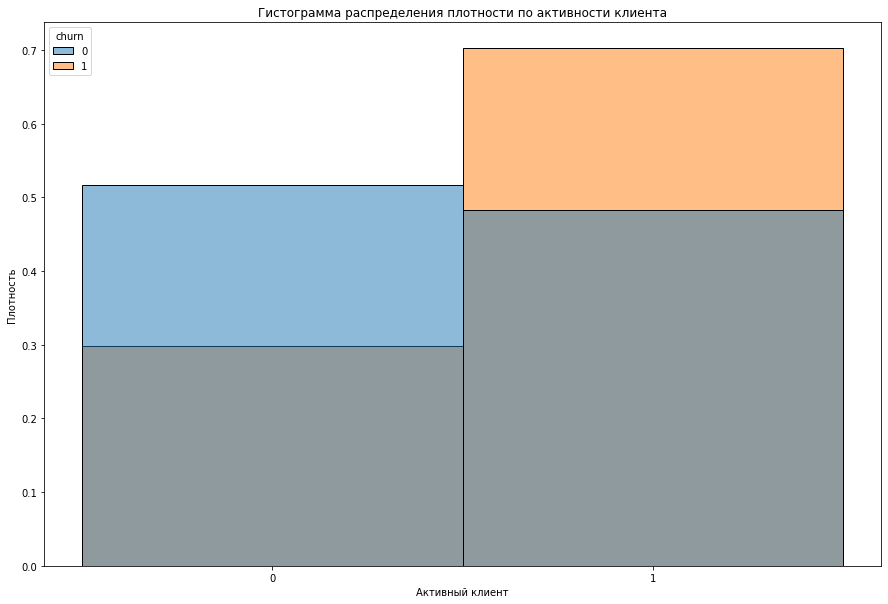

In [43]:
#построим распределение признака оттока по активности клиента
plt.figure(figsize=(15, 10))
sns.histplot(data=bank, x='last_activity', hue='churn', stat='density', common_norm=False, discrete=True)
plt.xlabel('Активный клиент')
plt.xticks(np.arange(0, 2, 1))
plt.ylabel('Плотность')
plt.title('Гистограмма распределения плотности по активности клиента');

*Большая вероятность оттока у клиентов, которые пользуются продуктом банка более 3 месяцев.*

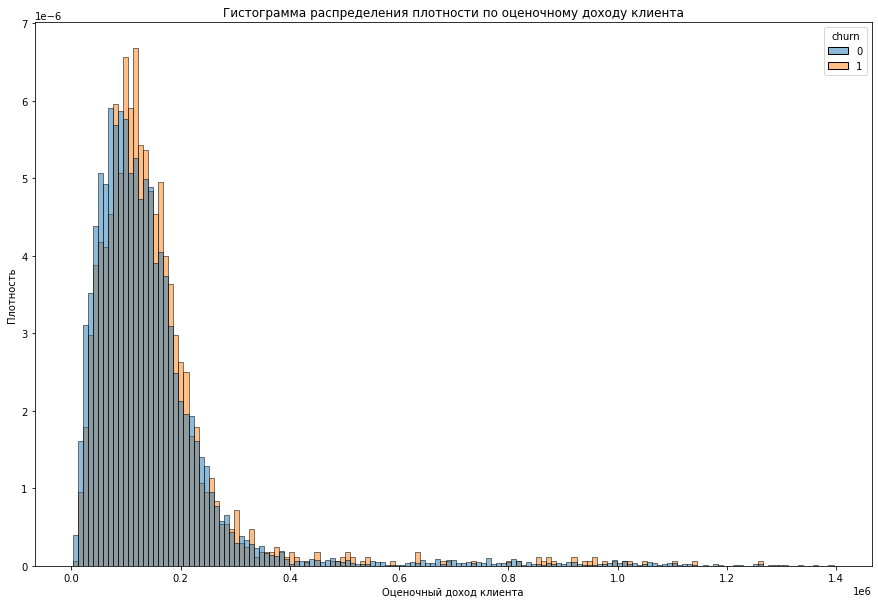

In [44]:
#построим распределение признака оттока по оценочному доходу клиента
plt.figure(figsize=(15, 10))
sns.histplot(data=bank, x='est_salary', hue='churn', stat='density', common_norm=False)
plt.xlabel('Оценочный доход клиента')
plt.ylabel('Плотность')
plt.title('Гистограмма распределения плотности по оценочному доходу клиента');

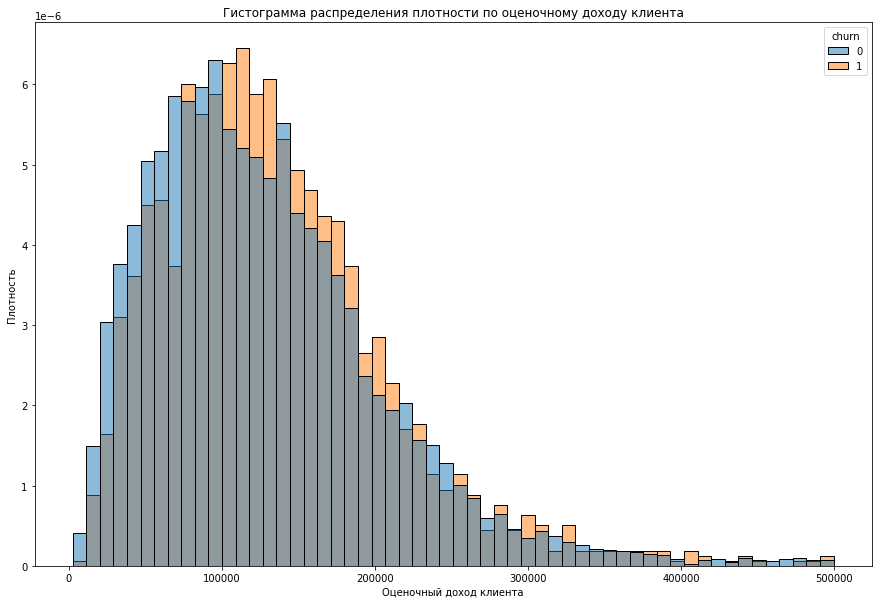

In [45]:
#сделаем срез до 500т.р на балансе
plt.figure(figsize=(15, 10))
sns.histplot(data=bank[bank['est_salary'] < 500000], x='est_salary', hue='churn', stat='density', common_norm=False)
plt.xlabel('Оценочный доход клиента')
plt.ylabel('Плотность')
plt.title('Гистограмма распределения плотности по оценочному доходу клиента');

*Начиная с уровня дохода пользователя примерно в 110-120т.р., клиент склонен к оттоку, вплоть до отметки 200-220т.р. Это вполне логично, так как большие средства располагают к большей вариативности их инвестирования, в том числе и продукты других банков.*

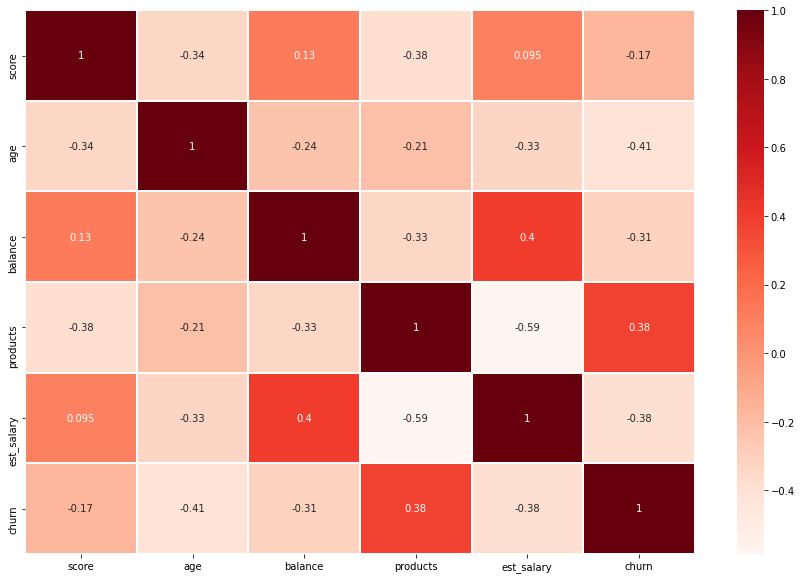

In [46]:
#построим матрицу корреляции и тепловую карту для churn и количественных признаков
plt.figure(figsize=(15,10))
bank_corr = bank[['score', 'age', 'balance',
       'products', 'est_salary', 'churn']].corr()
sns.heatmap (bank_corr.corr(), annot=True, cmap= 'Reds', linewidths=1);

*Во всех случаях мы наблюдаем умеренное значение корреляции между признаком оттока и остальными количественными признаками. Самое большое значение с churn у параметра age, самый низкий у параметра score.*

*Среди количественных, лучше всего между собой коррелируют признаки est_salary и products. Это объяснимо, так как чем больше зарплата клиента, тем больше у него возможностей и ресурсов для открытия других продуктов.*

Для оценки корреляции между категориальными признаками, рассчитаем коэффициент корреляции Phik и построим тепловую карту

interval columns not set, guessing: ['score', 'age', 'equity', 'balance', 'products', 'credit_card', 'last_activity', 'est_salary', 'churn']


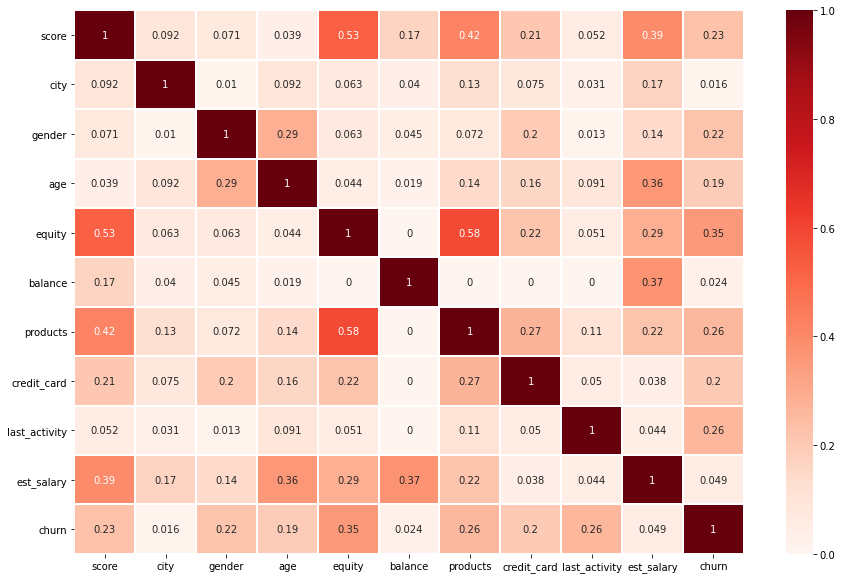

In [47]:
bank_corr_2=bank.drop(columns=['user_id'])
plt.figure(figsize=(15,10))
sns.heatmap (bank_corr_2.phik_matrix(), annot=True, cmap= 'Reds', linewidths=1);

*Категориальные признаки показывают слабую корреляцию с признаком оттока. Значения в пределе 0,5.*

**По имеющимся признакам, составляя портрет типичных клиентов которые склонны и не склонны уходить из банка, можно сделать следующие выводы:**

Медианнные значения отточных клиентов практически по всем пунктам превышают медианные значения оставшихся клиентов. У них выше балл кредитного скоринга, в среднем на 1 выше балл собственности, а также большее количество продуктов банка в пользовании, соответственно активность его выше. 

Клиенты, которые предпочли остаться в банке, обладают гораздо меньшей суммой на банковском счете, они реже пользуются банковскими продуктами и чаще являются обладателями кредитной карты, чем ушедшие клиенты. 

По признакам:
- по городам процент оттока примерно одинаковый, однако в Ярославле гораздо большая тенденция к этому явлению, так как количество клиентов гораздо больше, чем в Ростове и Рыбинске;
- при одинаковом количестве пользователей среди мужчин и женчин, мужчины гораздо более склонны к уходу из банка, чем женщины;
- явные интервалы оттока по годам - от 25 до 35 и от 50 до 60 лет;
- клиенты, у которых 3 баллы собственности и больше с большой долей вероятности покинут банк;
- чем больше сумма на счете, тем вероятнее отток пользователей;
- начиная с уровня дохода 110-120т.р. велика вероятность оттока клиентов.

### Провека статистических гипотез

**Гипотеза №1**

*Проверим гипотезу о различии дохода между теми клиентами, которые ушли и теми, которые остались:*

H0 - между ушедшими и оставшимися клиентами различий в доходе нет

H1 - различия между оставшимися и ушедшими клиентами есть

In [48]:
#создадим 2 отдельных датафрейма для ушедших и оставшихся клиентов
churn_0 = bank.query('churn == 0')
churn_1 = bank.query('churn == 1')

In [49]:
#проверим гипотезу, используя t-критерий Стьюдента.
alpha = 0.01

results = st.ttest_ind(churn_0['est_salary'], churn_1['est_salary'])
    
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

p-значение: 0.8766325121997608
Не удалось отвергнуть нулевую гипотезу


Можно сделать вывод, что различия между доходами оставшихся и ушедших клиентов не имеют статистической значимости.

**Гипотеза №2**

*Проверим гипотезу о различии в возрасте между теми клиентами, которые ушли и теми, которые остались:*

H0 - между ушедшими и оставшимися клиентами различий в возрасте нет

H1 - различия между оставшимися и ушедшими клиентами есть

In [50]:
#проверим гипотезу, используя t-критерий Стьюдента.
alpha = 0.01

results = st.ttest_ind(churn_0['age'], churn_1['age'])
    
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

p-значение: 5.010125161289605e-07
Отвергаем нулевую гипотезу


p-value меньше уровня статистической значимости, средний возраст ушедших и оставшихся клиентов различается.

**Гипотеза №3**

*Проверим гипотезу о равенстве используемых продуктов банка между теми клиентами, которые ушли и теми, которые остались:*

H0 - между ушедшими и оставшимися клиентами различий в используемых продуктов банка нет

H1 - различия между оставшимися и ушедшими клиентами есть

In [51]:
#проверим гипотезу, используя t-критерий Стьюдента.
alpha = 0.01

results = st.ttest_ind(churn_0['products'], churn_1['products'])
    
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

p-значение: 2.2291222212365114e-208
Отвергаем нулевую гипотезу


p-value меньше уровня статистической значимости, количество используемых продуктов ушедших и оставшихся клиентов различается.

**Результаты статистических гипотез подтвердили ранее полученные медианные данные о том, что доходы ушедших и оставшихся клиентов примерно равны, а их возраст и количество используемых продуктов отличается**

## Формирование сегментов пользователей

**На основании интервалов значений по гистограммам плотности распределения и значений корреляции, сформируем сегменты от 500 до 1818 пользователей с процентом оттока, превышающим среднее по датафрейму в 18%**

*Сформируем 1 сегмент:*
- пол пользователя - мужчина
- возраст - от 25 до 35
- количество продуктов - 2 и больше

In [52]:
bank.query('gender == "М" & 25 <= age <= 35 & products >= 2') \
.agg({"churn":['mean', 'sum', 'count']})

,churn
mean,0.35
sum,386.00
count,"1,116.00"


**Отток клиентов первого сегмента 35%**

*Сформируем 2 сегмент:*
- пол пользователя - мужчина
- возраст - от 50 до 60
- количество продуктов - 2 и больше

In [53]:
bank.query('gender == "М" & 50 <= age <= 60 & products >= 2') \
.agg({"churn":['mean', 'sum', 'count']})

,churn
mean,0.41
sum,228.00
count,555.00


**Отток клиентов второго сегмента 41%**

*Сформируем 3 сегмент:*
- пол пользователя - мужчина
- оценочный доход клиента - больше 110т.р.
- количество продуктов - 2 и больше

In [54]:
bank.query('gender == "М" & est_salary > 110000 & products >= 2') \
.agg({"churn":['mean', 'sum', 'count']})

,churn
mean,0.37
sum,633.00
count,"1,721.00"


**Отток клиентов третьего сегмента 37%**

*Сформируем 4 сегмент:*
- пол пользователя - мужчина
- оценочный доход клиента - больше 110т.р.
- кредитная карта - отсутствует

In [55]:
bank.query('gender == "М" & est_salary > 110000 & credit_card == 0') \
.agg({"churn":['mean', 'sum', 'count']})

,churn
mean,0.38
sum,297.00
count,787.00


**Отток клиентов четвертого сегмента 38%**

*Сформируем 5 сегмент:*
- количество продуктов - 2 и больше
- оценочный доход клиента - больше 110т.р.
- баланс на счете - больше 750т.р.

In [56]:
bank.query('products >= 2 & est_salary > 110000 & balance > 750000') \
.agg({"churn":['mean', 'sum', 'count']})

,churn
mean,0.44
sum,670.00
count,"1,539.00"


**Отток клиентов пятого сегмента 44%**

*Сформируем 6 сегмент:*
- баллы кредитного скоринга - от 850 до 930
- возраст - от 25 до 35
- количество баллов собственности - 3 и больше

In [57]:
bank.query('850 <= score <= 930 & 25 <= age <= 35 & equity >= 3') \
.agg({"churn":['mean', 'sum', 'count']})

,churn
mean,0.48
sum,389.00
count,816.00


**Отток клиентов шестого сегмента 48%**

*Сформируем 7 сегмент:*
- баллы кредитного скоринга - от 850 до 930
- активный клиент - да
- количество баллов собственности - 3 и больше

In [58]:
bank.query('850 <= score <= 930 & last_activity == 1 & equity >= 3') \
.agg({"churn":['mean', 'sum', 'count']})

,churn
mean,0.56
sum,712.00
count,"1,266.00"


**Отток клиентов седьмого сегмента 56%**

## Общий вывод

**На этапе обзора данных:**
- загружены библиотеки
- изучена информация о датафрейме - всего 10000 записей, 12 столбцов

**На этапе предобработки данных:**
- привели названия всех столбцов к общему виду
- привели в соответствие типы столбцов age и score
- обработали пропуски
- удалили дубликаты по столбцу user_id, а также выброс в столбце products - для дальнейшего анализа осталось 9922 записи

**В результате исследовательского анализа данных:**
- определили значение оттока клиентов во всем датафрейме - 18%
- изучили медианные значения каждого признака для оставшихся клиентов и тех, кто покинул банк
- построили гистограммы распределения плотности для каждого из признакови определили границы оттока:
    - score от 820 до 900 
    - city - Ярославль
    - gender - мужчина
    - age - от 25 до 35 и от 50 до 60 
    - equity - 3 и больше
    - balance - от 750т.р. и больше
    - products - 2 и больше
    - credit_card - отсутствует
    - last_activity - активный клиент
    - est_salary - от 110-120т.р.
- построили матрицу корреляции Пирсона для количественных признаков - самое большое значение с churn у параметра age, самый низкий у параметра score, лучше всего между собой коррелируют признаки est_salary и products
- построили тепловую карту с помощью коэффициента корреляции Phik для категориальных признаков - категориальные признаки показывают слабую корреляцию с признаком оттока. Значения в пределе 0,5.*

**На этапе проверки статистических гипотез:**
- проверили гипотезу о различии дохода между теми клиентами, которые ушли и теми, которые остались - различия между доходами оставшихся и ушедших клиентов не имеют статистической значимости
- проверили гипотезу о различии в возрасте между теми клиентами, которые ушли и теми, которые остались - средний возраст ушедших и оставшихся клиентов различается
- проверили гипотезу о равенстве используемых продуктов банка между теми клиентами, которые ушли и теми, которые остались - количество используемых продуктов ушедших и оставшихся клиентов различается

**Результаты сегментирования пользователей**
- 1 сегмент, состоящий из мужчин от 25 до 35 лет, использовавшие 2 продукта банка и больше - отток 35%
- 2 сегмент, состоящий из мужчин от 50 до 60 лет, использовавшие 2 продукта банка и больше - отток 41%
- 3 сегмент, состоящий из мужчин с оценочным доходом от 110т.р. и больше, использовавшие 2 продукта банка и больше - отток 37%
- 4 сегмент, состоящий из мужчин с оценочным доходом от 110т.р. и не использующие кредитные карты - отток 38%
- 5 сегмент, состоящий из клиентов с оценочным доходом от 110т.р. и балансом на счете больше 750т.р. и использовавшие 2 продукта банка и больше - отток 44%
- 6 сегмент, состоящий из клиентов от 25 до 35 лет с количеством баллов собственности 3 и больше и баллами кредитного рейтинга от 850 до 930 - отток 48%
- 7 сегмент, состоящий из активных клиентов с количеством баллов собственности 3 и больше и баллами кредитного рейтинга от 850 до 930 - отток 56%

**Рекомендации**

Исходя из полученных данных, можно сделать вывод, что банком в основном пользуется "средний класс". Пользователи, чей доход выше среднего, от 110т.р. и кого есть вклад от 750т.р. стремятся уйти из банка. Необходимо продумать способы удержания "дорогих" клиентов - программы лояльности или бонусные программы. Можно также для этих клиентов предложить повышенный кэшбек на некоторые категории покупок, учитывая что преимущественно они пользуются дебетовыми картами, а не кредитными в виду отсутствия такой потребности из-за хорошего достатка. 
  
Обращает на себя внимание отток молодых людей в возрасте от 25 до 35 лет. Это популярный возраст для оформления кредитов и ипотек. Можно сделать вывод, что условия, предлагаемые банком, не выгодны для них и требуются пересмотру. Желательно начать с клиентов, которые обслуживаются в банках Ярославля, так как там наблюдается большая тенденция к оттоку.

Следует обратить внимание на пользователей от 50 до 60 лет. Это предпенсионный возраст и очень важно удержать данных клиентов, которые прибавляются из года в год. Обычно пользователи этого возраста менее активны в пользовании информационных услуг банка и предпочитают личное посещение банковских отделений. Стоит пересмотреть качество обслуживания и продумать банковский продукт с учетом возрастных особенностей клиентов, который поспособствует в дальнейшем хранить свои пенсионные сбережения именно в этом банке. 

## Презентация
Светлана, приветствую!
Презентацию прикреплю после одобрения проекта :)

Ссылка на презентацию:
    
https://disk.yandex.ru/d/btagT0vwv_F4qQ